## 교차 검증

overfitting(과적합) : 모델이 내가 지금 학습시킨 데이터에만 최적화되어, 실제 예측을 새로 들어온 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 것을 말한다.

고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생김. 과적합된 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하됨. 이런 문제점을 개선하기 위해 교차 검증 실시

교차 검증은 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행  

각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 들의 모델 최적화를 더욱 손쉽게 할 수 있음

대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스  
ML에 사용하는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나누고, 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용

mglearn : introduction to Machine Learnig with Python의 저자가 코드를 간략하게 표현하기 위해 제작한 교재 전용 라이브러리

pip install mglearn

In [2]:
import mglearn

In [4]:
from sklearn.datasets import load_iris

In [5]:
# 분류
from sklearn.linear_model import LogisticRegression

In [54]:
# 정확도 측정
from sklearn.metrics import accuracy_score

In [74]:
import numpy as np
import pandas as pd

### K-폴드 교차 검증

가장 보편적으로 사용되는 교차 검증 기법

K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

원데이터 target 비율대로 이쁘게 나누는 경우가 거의 없기 때문에 현실에서 잘 사용은 못함


#### 헷갈림 방지 : 아래 plot에서 나온 test data는 train_test에서 test가 아니라 train안에서 검증을 위해 쪼갠 validation이다

교재 p.104  성능검증


**폴드가 5개인 경우(K = 5)**  

5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가.  





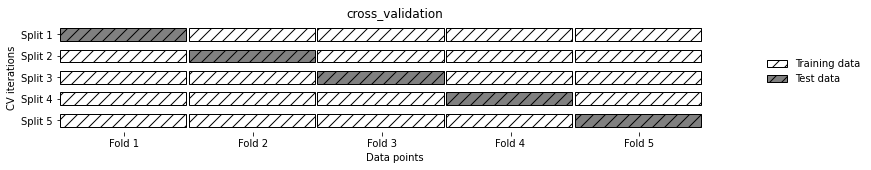

In [3]:
mglearn.plot_cross_validation.plot_cross_validation()

In [69]:
from sklearn.model_selection import KFold, train_test_split

In [40]:
data_iris = load_iris()

k개의 폴드 세트로 분리

In [45]:
# 10개로 분리하겠다
kfold = KFold(n_splits=10)

In [67]:
print('iris size : ', data_iris.data.shape[0])

iris size :  150


In [47]:
# <generator object _BaseKFold.split at 0x000002A3451D50B0>
# generator는 index 존재
kfold.split(data_iris.data).

<generator object _BaseKFold.split at 0x000002A3451D50B0>

#### k=10인 경우 k-fold 교차 검증 실시
검증순서0~10  
[훈련데이터 인덱스]  
[테스트데이터 인덱스]

In [49]:
# index만 출력해봄
n_iter = 0
for train_index, test_index in kfold.split(data_iris.data):
    print(n_iter)
    print(train_index, test_index)
    n_iter = n_iter+1

0
[ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 11

kfold 교차검증이 이루어진 인덱스에 해당하는   
(훈련, 테스트)X(data),   
(훈련, 테스트)y정답(target) 데이터 할당  

학습

예측

정확도 검증

---

정확도검증값들(10개) 평균

실제 데이터 정확도

10개로 교차 검증 진행한 kfold교차검증 정확도보다  
실제 적은 데이터로 한 테스트 정확도는 낮음

In [71]:
kfold = KFold(n_splits=10)

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(data_iris.data, data_iris.target)

lr = LogisticRegression(max_iter=4000)

n_iter = 0
cv_accuracy = []

for train_index, test_index in kfold.split(X_train_train):
    X_train, X_test = X_train_train[train_index],X_train_train[test_index]
    y_train, y_test = y_train_train[train_index],y_train_train[test_index]
    
    lr.fit(X_train, y_train) 
    pred = lr.predict(X_test) 
    accuracy = accuracy_score(y_test, pred)
    
    #print(np.round(accuracy,4))
    #print(lr.score(X_test, y_test))
    
    cv_accuracy.append(accuracy)
  
    n_iter = n_iter+1
    
    print('{0}교차 검증 정확도:{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter, np.round(accuracy,4), X_train.shape[0], X_test.shape[0]))
    print('{0}검증 세트 인덱스{1}'.format(n_iter, test_index))
    
print('\n평균 검증 정확도 : ', np.mean(cv_accuracy))

print('\n테스트 정확도', lr.score(X_train_test, y_train_test))

1교차 검증 정확도:0.8333, 학습 데이터 크기:100, 검증 데이터 크기:12
1검증 세트 인덱스[ 0  1  2  3  4  5  6  7  8  9 10 11]
2교차 검증 정확도:1.0, 학습 데이터 크기:100, 검증 데이터 크기:12
2검증 세트 인덱스[12 13 14 15 16 17 18 19 20 21 22 23]
3교차 검증 정확도:1.0, 학습 데이터 크기:101, 검증 데이터 크기:11
3검증 세트 인덱스[24 25 26 27 28 29 30 31 32 33 34]
4교차 검증 정확도:0.9091, 학습 데이터 크기:101, 검증 데이터 크기:11
4검증 세트 인덱스[35 36 37 38 39 40 41 42 43 44 45]
5교차 검증 정확도:1.0, 학습 데이터 크기:101, 검증 데이터 크기:11
5검증 세트 인덱스[46 47 48 49 50 51 52 53 54 55 56]
6교차 검증 정확도:1.0, 학습 데이터 크기:101, 검증 데이터 크기:11
6검증 세트 인덱스[57 58 59 60 61 62 63 64 65 66 67]
7교차 검증 정확도:1.0, 학습 데이터 크기:101, 검증 데이터 크기:11
7검증 세트 인덱스[68 69 70 71 72 73 74 75 76 77 78]
8교차 검증 정확도:1.0, 학습 데이터 크기:101, 검증 데이터 크기:11
8검증 세트 인덱스[79 80 81 82 83 84 85 86 87 88 89]
9교차 검증 정확도:1.0, 학습 데이터 크기:101, 검증 데이터 크기:11
9검증 세트 인덱스[ 90  91  92  93  94  95  96  97  98  99 100]
10교차 검증 정확도:1.0, 학습 데이터 크기:101, 검증 데이터 크기:11
10검증 세트 인덱스[101 102 103 104 105 106 107 108 109 110 111]

평균 검증 정확도 :  0.9742424242424242

테스트 정확도 0.9210526315789473


### Stratified K 폴드

- 불균형(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
<br/>

- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말함
<br/>

- 원데이터 타겟(class값 0 or 1)의 비율을 유지하면서 k개의 폴드로 나누기 때문에 이산값 형태의 레이블이 아닌 연속값 형태의 레이블을 사용하는 회귀에서는 불가능(연속된 숫자값별로 분포를 정하는 의미가 없음)하고 **분류**에서만 가능함. 
<br/>



위에서 한 K폴드처럼 인덱스를 순서대로 가져오면 class의 차이가 너무 나게 분포 되어있을때 훈련-검증 과정에서 문제생김(어느 데이터 세트에는 들어가 있고 어디에는 안들어가있는 등..)


Stratified K폴드는 (K폴드는 해결하지 못하는) 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해준다.

원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함.

In [73]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
StratifiedKFold

In [75]:
iris = load_iris()

사이킷런 붓꽃 데이터 세트를 dataframe으로 생성 후 레이블 값의 분포도 확인

In [76]:
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)

In [77]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


레이블 값 0,1,2 모두 50개로 동일(Setosa, Versicolor, Virginica 품종 모두 50개)

In [78]:
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

#### 이슈가 발생하는 상황에서 K폴드와 StratifiedK폴드 비교




**K폴드(n_splits=3)인 상황에서**  

- 3개의 폴드 세트를 K폴드로 생성하고, 각 교차 검증 시마다 생성되는 학습.검증 레이블 데이터 값의 분포도 확인
<br/>

- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습레이블 2개, 검증레이블 1개 완전히 다른 값으로 추출
<br/>

- 이 중 첫번째 교차검증을 보면 학습 레이블은 1,2 밖에 없으므로 0의 경우는 전혀 학습하지 못하고, 검증 레이블은 0밖에 없으므로 학습모델은 절대 0을 예측하지 못함  
이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 됨

In [87]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print('\n\n')

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64



## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64



## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64





In [88]:
dt_clf = LogisticRegression(max_iter=4000)

kfold = KFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in kfold.split(iris.data):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2},검증 데이터 크기: {3}' 
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))



#1 교차 검증 정확도 :0.0, 학습 데이터 크기: 100,검증 데이터 크기: 50
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#2 교차 검증 정확도 :0.0, 학습 데이터 크기: 100,검증 데이터 크기: 50
#2 검증 세트 인덱스:[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

#3 교차 검증 정확도 :0.0, 학습 데이터 크기: 100,검증 데이터 크기: 50
#3 검증 세트 인덱스:[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0. 0. 0.]
## 평균 검증 정확도: 0.0


**Stratified K폴드(n_splits=3)인 상황에서**

- StratifiedKFold는 위에서 확인한 KFold의 문제점(분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영 못함)을 해결해준다.
<br/>
- 사용하는 법은 KFold와 거의 비슷하지만, 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 넣어줘야 함
<br/>

- 출력 결과를 보면 학습 레이블과 검증 레이블 데이터 값의 분포가 학습레이블 3개/검증레이블 3개로 동일하게 할당됨
    첫번째 교차 검증에서 학습 레이블 0,1,2 각각 33개, 검증 레이블 0,1,2 각각 17개로 레이블별로 동일하게 할당됨

- 이렇게 분할이 되어야 레이블 0,1,2를 모두 학습할 수 있고, 이에 기반해 검증을 수행할 수 있음.
    
즉, 일반적으로 stratified k폴드를 사용

In [85]:
skf = StratifiedKFold(n_splits=3) # default: n_splits = 5
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
    print('\n\n')

## 교차 검증: 1
학습 레이블 데이터 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64



## 교차 검증: 2
학습 레이블 데이터 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64



## 교차 검증: 3
학습 레이블 데이터 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64





3개의 Stratified K폴드로 교차 검증, 교차 검증별 정확도와 평균 정확도 출력

원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로, 왜곡된 레이블 세트에서는 반드시 Stratified K폴드로 교차 검증해야함

In [89]:
dt_clf = LogisticRegression(max_iter=4000)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(iris.data, iris.target):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2},검증 데이터 크기: {3}' 
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))



#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100,검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.96, 학습 데이터 크기: 100,검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100,검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.96 0.98]
## 평균 검증 정확도: 0.9733333333333333


### cross_val_score

- K폴드나 Stratified K폴드 같은 교차 검증을 더 편리하게 수행할 수 있도록 사이킷런에서 제공하는 대표적인 API
<br/>

- 폴드 세트 설정, for루프에서 반복으로 학습 및 테스트 데이터 인덱스 추출, 반복적으로 학습과 예측 수행 및 예측 성능 반환
    이 일련의 과정을 한번에 수행해주는 API   
<br/>

- cross_val_score(estimator, X, y=None, scoring=None, cv-None, n_jobs-1, verbose-0, fit_params=None, pre_dispatch=2*n_jobs)  
estimator : 알고리즘  클래스
X : 피처 데이터 세트  
y : 레이블 데이터 세트  
scoring : 예측 성능 평가 지표  
cv : 교차 검증 폴드 수



cross_val_score는 내부적으로는 **Stratified K폴드**를 사용    
cross_val_score는 accuracy정확도 평가지표만 보여주지만,    
**cross_validate**는 여러 개의 평가 지표 반환함  

즉, 여태까지 한 반복작업들을 한번에 해줌

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- cv로 지정된 횟수만큼 scoring 파리미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환함  
<br/>

- 일반적으로 이를 평균해 평가 수치로 사용함   
<br/>

- cross_val_score()는 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜줘 간단하게 교차검증 수행 가능  


### GridSearchCV

- 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에 수행
<br/>

- 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공
<br/>

- 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾음.
     데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 마라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적 파라미터 찾음
<br/>

- 순차적으로 하이퍼 파라미터를 변경하면서 교차 검증 데이터 세트에 수행 성능을 측정.
    (ex) cv 3회 * 6개 파라미터 조합 = 18회 학습/평가
<br/>

- GridSearchCV(estimator, param_grid, scoring, cv, refit)  
estimator : 알고리즘 클래스  
param_grid : key + list 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파리머터명과 사용될 여러 파라미터 값을 지정  
scoring : 예측 성능을 측정할 평가 방법을 지정  
cv : 교차 검증을 위해 분할되는 학습.테스트 세트 개수 지정  
refit : 디폴트가 True, True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력 된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴


아래는 결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해 붓꽃 데이터를 예측 분석하는 데 GridSearchCV를 이용하는 예제.  
학습/테스트 데이터 분리 후 학습 데이터에서 GridSearchCV를 이용해 최적 하이퍼 파라미터 추출.

DecisionTreeClassifier의 중요 하이퍼 파라미터 : max_depth,  min_samples_split


In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 테스트할 파라미터 세트는 딕셔너리 형태 
# 하이퍼 파라미터의 명칭은 문자열 Key값 , 하이퍼 파라미터 값은 리스트 
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

학습 데이터 세트를 GridSearchCV 객체의 fit() 메서드에 인자로 입력  

학습 데이터를 cv에 입력된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 결과를 **cv_results_** 속성에 기록함

cv_results_는 GridSearchCV의 결과 세트이며, 딕셔너리 형태로 key값과 list형태의 value값 가짐  

In [5]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


위의 결과는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 병경하면서 학습 및 평가를 수행했음을 나타냄  

- params : 수행할 때마다 적용된 하이퍼 파라미터값  
<br/>

- mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트(split0_test_score	split1_test_score	split2_test_score)에 대해 총 수행한 평가 평균값  
<br/>

- rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냄. 1이 가장 뛰어난 순위이며, **1위 파라미터가 최적의 하이퍼 파라미터임**

GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨

In [6]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


디폴트설정인 refit=True 로 인해 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_ 로 저장함.  

이미 학습된 _best_estimator_를 이용해 앞에서 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가

In [8]:
from sklearn.metrics import accuracy_score
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


#### 일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테슽으 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다